# Semi Parammetric Latent Factor Model

### Model   $Y=\phi * u + \sigma^2I$
##### Where, $\phi \in R ^{cxp}, u \in R^{pxn}$ and $Y \in R^{cxn}$
##### Also, $u_p \in GP(0,K^p)$ where $K^p$ is the covariance kernel for that particular gaussian process


In [1]:
### necessary Imports
import numpy as np
import pylab as pb
from matplotlib import pyplot as plt
import GPy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### True Model:

Here we generate our data that we can later use to check our solution

#### $\phi \in N(0,I)$

#### $u$
First we have similar kernels so that processes can be easily distinguished
We choose one as a exponential quad Kernel with shorter length scale.

Phi
[[ 0.98374526 -1.17112065]
 [ 3.1324994   3.50168064]
 [ 1.38744257  4.50418495]]


<matplotlib.colorbar.Colorbar instance at 0x7f7b3eab8758>

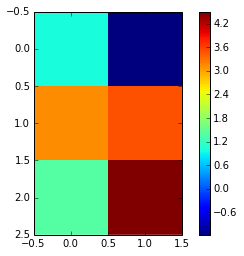

In [4]:
P = 2
C = 3
N = 50
s2 = 0.5
x = np.linspace(0,1,N)
phi = np.random.normal(loc=2.5,scale=2,size=(C,P))
print "Phi\n",phi
plt.imshow(phi,interpolation='none')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f7b3e9873b0>

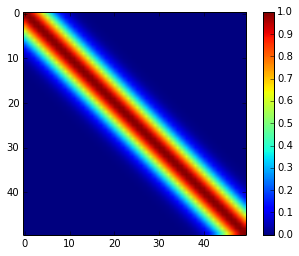

In [5]:
class Kernel:
    @staticmethod
    def exponenQuad(x,xprime,a=1,l=0.5,**kwargs):
        if kwargs:
            if kwargs['a']:
                a = kwargs['a']
            if kwargs['l']:
                l = kwargs['l'] 
        return a*np.exp((-0.5*(x - xprime)**2)/l**2)
    @staticmethod
    def generateKernel(kernelFunc,x,xprime,**kwargs):
        kernel = np.zeros((x.size,xprime.size))
        for i in range(x.size):
            for j in range(xprime.size):
                kernel[i,j] = kernelFunc(i,j,**kwargs)
        return np.mat(kernel)
K = list()
K.append(Kernel.generateKernel(Kernel.exponenQuad,x,x,l=4))
K.append(Kernel.generateKernel(Kernel.exponenQuad,x,x,l=1))
imshow(K[0],interpolation=None)       
plt.colorbar()

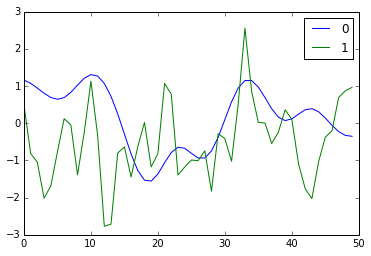

In [6]:
#Latent Gaussian Processes:
u = np.zeros((P,N))
for p in range(P):
    u[p,:] = np.random.multivariate_normal(mean=np.zeros(N).flatten(),cov=K[p])
    plt.plot(u[p,:],label=p)
plt.legend()

In [35]:
# Output Values:
s2 = 0
Y = phi.dot(u) + s2


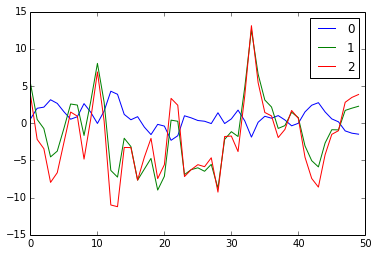

In [36]:
for c in range(C):
    plt.plot(Y[c,:],label=c)
plt.legend()

## Now objective is to variationally approximate and recover Phi 

Variational Inducing Updates are:


In [37]:
## get random inducing point
## Intialization for variational inference
P=2
noOfInductions = 20
n = np.random.choice(x,size=noOfInductions)
sparseY = np.mat(Y[:,n.astype(int)])
# Create Matrices
Knn = list()
KNn = list()
KnnInv = list()
KNN = list()
for i in range(P):
    Knn.append(Kernel.generateKernel(Kernel.exponenQuad,n,n,l=1,a=1))
    KNn.append(Kernel.generateKernel(Kernel.exponenQuad,x,n,l=1,a=1))
    KNN.append(Kernel.generateKernel(Kernel.exponenQuad,x,x,l=1,a=1))
    KnnInv.append(np.linalg.inv(Knn[i]))
    print KNn[i].shape,Knn[i].shape,KnnInv[i].shape
# Generate a guess for phi
phiHatMean = 0
phiHatV = 1
phiHatExp = np.random.normal(loc=phiHatMean,scale=phiHatV,size=(C,P))
uHatMeans = np.random.normal(loc=0,scale=1,size=(P,noOfInductions,1))
uHatVs = [np.ones((noOfInductions,noOfInductions))for p in range(P)]
uExp = np.random.normal(loc=0,scale=1,size=(P,N))

(50, 20) (20, 20) (20, 20)
(50, 20) (20, 20) (20, 20)


### Variational Updates are:

#### For U's:

$$\hat{u}_p = N(\Sigma_{p}^{-1}K_{n}^{-1}K_{Nn}Z_p,\Sigma_{p})$$
where $\Sigma_{p} = K_{n}^{-1} + \frac{1}{\sigma^2}K_{n}^{-1}K_{nN}UK_{Nn}K_{n}^{-1}$
and $Z_p = \sum_{c}^{C}<\phi_{cp}>(y_c - \sum_{i}^{P/p}<\phi_{ci}><u_{ip}>)$, 
and $U_p = \sum_{c}^{C}<\phi_{cp}^2>$

Also, Expectation of U is:

E[u] = $K_{Nn}K_{n}^{-1}\hat{\mu}_{p}$
where $\hat{\mu}_{p}$ is the mean of $\hat{u}_p$

#### For $\phi$:

$\phi = N(\Sigma_{\phi}^{-1}V_{\phi}y<U>^T, \Sigma{f})$
where $\Sigma_{\phi} = (V_{\phi}^{-1} + I )^-1$
and $V_{\phi} = <U><U>^T\sigma^2$

### And lower bound of liklelihood with respect to $u_p$ is given by:

$L(u_p) = log N(U_{p}^{-1}z_p| 0, U^{-1} + K_{Nn}K_{nn}^{-1}K_{nN}) - \frac{1}{2}tr(cov(u_p|\hat{u}_p)U_p) + consts..$




In [15]:
uHatMeans[1].shape

(20, 1)

(3, 2)


0 Variational Update



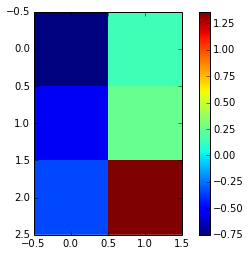

1 Variational Update

2 Variational Update

3 Variational Update

4 Variational Update

5 Variational Update

6 Variational Update

7 Variational Update

8 Variational Update

9 Variational Update

10 Variational Update

11 Variational Update

12 Variational Update

13 Variational Update

14 Variational Update

15 Variational Update

16 Variational Update

17 Variational Update

18 Variational Update

19 Variational Update

20 Variational Update

21 Variational Update

22 Variational Update

23 Variational Update

24 Variational Update

25 Variational Update

26 Variational Update

27 Variational Update

28 Variational Update

29 Variational Update

30 Variational Update

31 Variational Update

32 Variational Update

33 Variational Update

34 Variational Update

35 Variational Update

36 Variational Update

37 Variational Update

38 Variational Update

39 Variational Update

40 Variational Update

41 Variational Update

42 Variational Update

43 Variational Update

44 Variational Updat

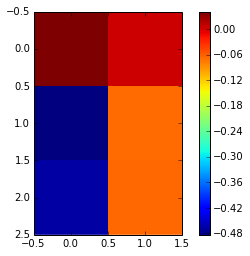

51 Variational Update

52 Variational Update

53 Variational Update

54 Variational Update

55 Variational Update

56 Variational Update

57 Variational Update

58 Variational Update

59 Variational Update

60 Variational Update

61 Variational Update

62 Variational Update

63 Variational Update

64 Variational Update

65 Variational Update

66 Variational Update

67 Variational Update

68 Variational Update

69 Variational Update

70 Variational Update

71 Variational Update

72 Variational Update

73 Variational Update

74 Variational Update

75 Variational Update

76 Variational Update

77 Variational Update

78 Variational Update

79 Variational Update

80 Variational Update

81 Variational Update

82 Variational Update

83 Variational Update

84 Variational Update

85 Variational Update

86 Variational Update

87 Variational Update

88 Variational Update

89 Variational Update

90 Variational Update

91 Variational Update

92 Variational Update

93 Variational Update

94 Variatio

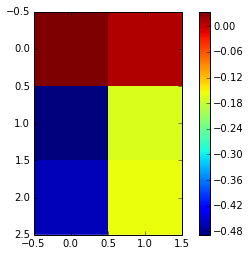

101 Variational Update

102 Variational Update

103 Variational Update

104 Variational Update

105 Variational Update

106 Variational Update

107 Variational Update

108 Variational Update

109 Variational Update

110 Variational Update

111 Variational Update

112 Variational Update

113 Variational Update

114 Variational Update

115 Variational Update

116 Variational Update

117 Variational Update

118 Variational Update

119 Variational Update

120 Variational Update

121 Variational Update

122 Variational Update

123 Variational Update

124 Variational Update

125 Variational Update

126 Variational Update

127 Variational Update

128 Variational Update

129 Variational Update

130 Variational Update

131 Variational Update

132 Variational Update

133 Variational Update

134 Variational Update

135 Variational Update

136 Variational Update

137 Variational Update

138 Variational Update

139 Variational Update

140 Variational Update

141 Variational Update

142 Variational 

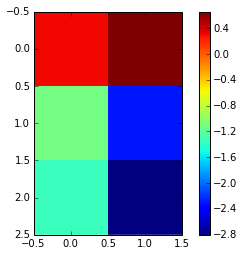

151 Variational Update

152 Variational Update

153 Variational Update

154 Variational Update

155 Variational Update

156 Variational Update

157 Variational Update

158 Variational Update

159 Variational Update

160 Variational Update

161 Variational Update

162 Variational Update

163 Variational Update

164 Variational Update

165 Variational Update

166 Variational Update

167 Variational Update

168 Variational Update

169 Variational Update

170 Variational Update

171 Variational Update

172 Variational Update

173 Variational Update

174 Variational Update

175 Variational Update

176 Variational Update

177 Variational Update

178 Variational Update

179 Variational Update

180 Variational Update

181 Variational Update

182 Variational Update

183 Variational Update

184 Variational Update

185 Variational Update

186 Variational Update

187 Variational Update

188 Variational Update

189 Variational Update

190 Variational Update

191 Variational Update

192 Variational 

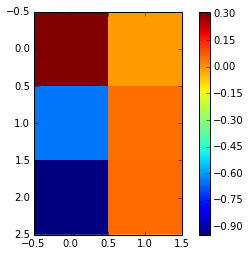

201 Variational Update

202 Variational Update

203 Variational Update

204 Variational Update

205 Variational Update

206 Variational Update

207 Variational Update

208 Variational Update

209 Variational Update

210 Variational Update

211 Variational Update

212 Variational Update

213 Variational Update

214 Variational Update

215 Variational Update

216 Variational Update

217 Variational Update

218 Variational Update

219 Variational Update

220 Variational Update

221 Variational Update

222 Variational Update

223 Variational Update

224 Variational Update

225 Variational Update

226 Variational Update

227 Variational Update

228 Variational Update

229 Variational Update

230 Variational Update

231 Variational Update

232 Variational Update

233 Variational Update

234 Variational Update

235 Variational Update

236 Variational Update

237 Variational Update

238 Variational Update

239 Variational Update

240 Variational Update

241 Variational Update

242 Variational 

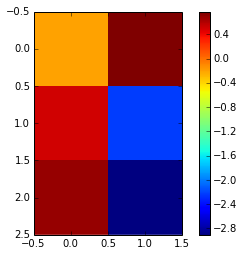

251 Variational Update

252 Variational Update

253 Variational Update

254 Variational Update

255 Variational Update

256 Variational Update

257 Variational Update

258 Variational Update

259 Variational Update

260 Variational Update

261 Variational Update

262 Variational Update

263 Variational Update

264 Variational Update

265 Variational Update

266 Variational Update

267 Variational Update

268 Variational Update

269 Variational Update

270 Variational Update

271 Variational Update

272 Variational Update

273 Variational Update

274 Variational Update

275 Variational Update

276 Variational Update

277 Variational Update

278 Variational Update

279 Variational Update

280 Variational Update

281 Variational Update

282 Variational Update

283 Variational Update

284 Variational Update

285 Variational Update

286 Variational Update

287 Variational Update

288 Variational Update

289 Variational Update

290 Variational Update

291 Variational Update

292 Variational 

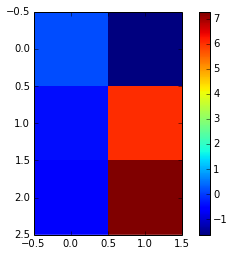

301 Variational Update

302 Variational Update

303 Variational Update

304 Variational Update

305 Variational Update

306 Variational Update

307 Variational Update

308 Variational Update

309 Variational Update

310 Variational Update

311 Variational Update

312 Variational Update

313 Variational Update

314 Variational Update

315 Variational Update

316 Variational Update

317 Variational Update

318 Variational Update

319 Variational Update

320 Variational Update

321 Variational Update

322 Variational Update

323 Variational Update

324 Variational Update

325 Variational Update

326 Variational Update

327 Variational Update

328 Variational Update

329 Variational Update

330 Variational Update

331 Variational Update

332 Variational Update

333 Variational Update

334 Variational Update

335 Variational Update

336 Variational Update

337 Variational Update

338 Variational Update

339 Variational Update

340 Variational Update

341 Variational Update

342 Variational 

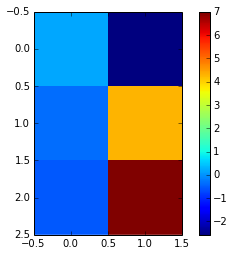

351 Variational Update

352 Variational Update

353 Variational Update

354 Variational Update

355 Variational Update

356 Variational Update

357 Variational Update

358 Variational Update

359 Variational Update

360 Variational Update

361 Variational Update

362 Variational Update

363 Variational Update

364 Variational Update

365 Variational Update

366 Variational Update

367 Variational Update

368 Variational Update

369 Variational Update

370 Variational Update

371 Variational Update

372 Variational Update

373 Variational Update

374 Variational Update

375 Variational Update

376 Variational Update

377 Variational Update

378 Variational Update

379 Variational Update

380 Variational Update

381 Variational Update

382 Variational Update

383 Variational Update

384 Variational Update

385 Variational Update

386 Variational Update

387 Variational Update

388 Variational Update

389 Variational Update

390 Variational Update

391 Variational Update

392 Variational 

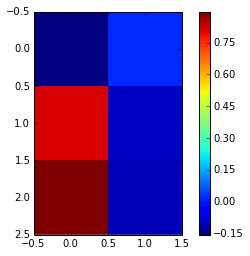

401 Variational Update

402 Variational Update

403 Variational Update

404 Variational Update

405 Variational Update

406 Variational Update

407 Variational Update

408 Variational Update

409 Variational Update

410 Variational Update

411 Variational Update

412 Variational Update

413 Variational Update

414 Variational Update

415 Variational Update

416 Variational Update

417 Variational Update

418 Variational Update

419 Variational Update

420 Variational Update

421 Variational Update

422 Variational Update

423 Variational Update

424 Variational Update

425 Variational Update

426 Variational Update

427 Variational Update

428 Variational Update

429 Variational Update

430 Variational Update

431 Variational Update

432 Variational Update

433 Variational Update

434 Variational Update

435 Variational Update

436 Variational Update

437 Variational Update

438 Variational Update

439 Variational Update

440 Variational Update

441 Variational Update

442 Variational 

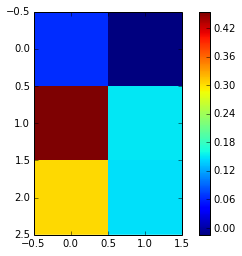

451 Variational Update

452 Variational Update

453 Variational Update

454 Variational Update

455 Variational Update

456 Variational Update

457 Variational Update

458 Variational Update

459 Variational Update

460 Variational Update

461 Variational Update

462 Variational Update

463 Variational Update

464 Variational Update

465 Variational Update

466 Variational Update

467 Variational Update

468 Variational Update

469 Variational Update

470 Variational Update

471 Variational Update

472 Variational Update

473 Variational Update

474 Variational Update

475 Variational Update

476 Variational Update

477 Variational Update

478 Variational Update

479 Variational Update

480 Variational Update

481 Variational Update

482 Variational Update

483 Variational Update

484 Variational Update

485 Variational Update

486 Variational Update

487 Variational Update

488 Variational Update

489 Variational Update

490 Variational Update

491 Variational Update

492 Variational 

In [39]:
for i in range(500):
    print str(i)+" Variational Update\n"
    if i%50 == 0:
        plt.imshow(phiHatExp,interpolation='none')
        plt.colorbar()
        plt.show()
    ## Variation Update for Phi
    Vf= uExp.dot(uExp.T)
    Sigmaf = np.mat(Vf + np.ones((P,P)))
    SigmafInv = np.linalg.inv(Sigmaf)
    phiHatExp = np.mat(Y) * uExp.T * SigmafInv
    ## Variation Update for Up:
    for p in range(P):
        #Find Up and Zp
        #Find summation terms
        Zp = np.mat(np.zeros((1,N)))
        Up = np.zeros((N,N))
        excludeP = np.arange(P)!=p
        for c in range(C):
            errTerm = Y[c,:] - phiHatExp[c,excludeP].dot(uExp[excludeP,:])
            #print errTerm.shape
            Zp += phiHatExp[c,p] * errTerm
            Up += phiHatExp[c,p]**2
        SigmaP = KnnInv[p] + KnnInv[p] * KNn[p].T * Up * KNn[p] * KnnInv[p]
        uHatMeans[p] = (np.linalg.inv(SigmaP)*KnnInv[p]*KNn[p].T*Zp.T).reshape(noOfInductions,1)
        uExp[p] = (KNn[p]*KnnInv[p]*uHatMeans[p]).reshape(1,N)


<matplotlib.colorbar.Colorbar instance at 0x7f7b3e39da28>

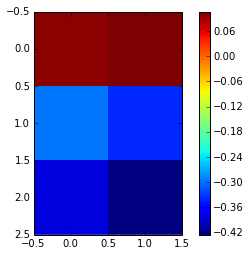

In [40]:
plt.imshow(phiHatExp,interpolation='None')
plt.colorbar()

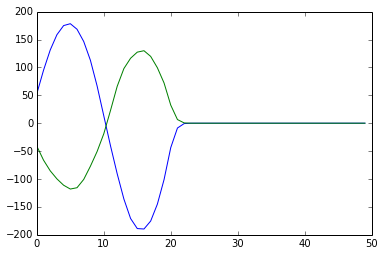

In [41]:
for p in range(P):
    plt.plot(uExp[p])

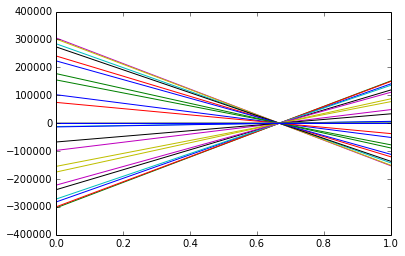

In [25]:
plt.plot(uExp)

In [371]:
a  = (np.linalg.inv(SigmaP)*KnnInv[p]*KNn[p].T*Zp.T)
a.shape = (noOfInductions,1)
uHatMeans[0] = a

ValueError: could not broadcast input array from shape (20,1) into shape (20)

In [316]:

for p in range(P):
    summationZ = 0
    summationPhiSq = 0
    for c in range(C):
        #findterm for U
        summationPhiSq += phiExp[c,p]**2
        #Error term for Z
        excludeP = np.arange(P)!=p
        errTerm = sparseY[c,:] - phiExp[c,excludeP].dot(uExp[excludeP,:])
        summationZ += phiExp[c,p]*errTerm
    Zp = summationZ
    Up = np.mat(np.diag(np.ones(N)*summationPhiSq))
    SigmaP = KnnInv[p] + KnnInv[p] * KnN[p] * Up * KnN[p].T * KnnInv[p] 
    MuP = np.linalg.inv(SigmaP)*KnnInv[p]*KnN[p]*Zp.T
    ## Variational Updates for individual u's
    uHatMeans[p] = MuP
    uHatSigmas[p] = SigmaP
## Update U expectations
    
    

ValueError: matrices are not aligned

In [317]:
print np.linalg.inv(SigmaP).shape,KnnInv[p].shape,KnN[p].shape,Zp.T.shape

(20, 20) (20, 20) (20, 50) (20, 1)


In [311]:
Yhat = Y[:,n.astype(int)]

In [312]:
Yhat

array([[ 1.54891182,  1.54891182,  1.54891182,  1.54891182,  1.54891182,
         1.54891182,  1.54891182,  1.54891182,  1.54891182,  1.54891182,
         1.54891182,  1.54891182,  1.54891182,  1.54891182,  1.66628876,
         1.54891182,  1.54891182,  1.54891182,  1.54891182,  1.54891182],
       [ 1.75082811,  1.75082811,  1.75082811,  1.75082811,  1.75082811,
         1.75082811,  1.75082811,  1.75082811,  1.75082811,  1.75082811,
         1.75082811,  1.75082811,  1.75082811,  1.75082811,  1.70976584,
         1.75082811,  1.75082811,  1.75082811,  1.75082811,  1.75082811],
       [-1.28455901, -1.28455901, -1.28455901, -1.28455901, -1.28455901,
        -1.28455901, -1.28455901, -1.28455901, -1.28455901, -1.28455901,
        -1.28455901, -1.28455901, -1.28455901, -1.28455901, -1.99535756,
        -1.28455901, -1.28455901, -1.28455901, -1.28455901, -1.28455901]])